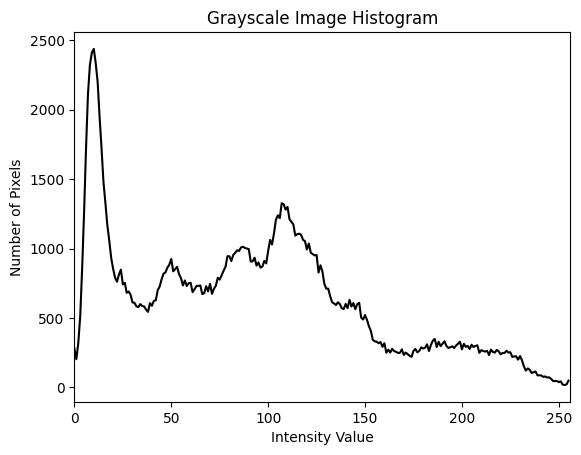

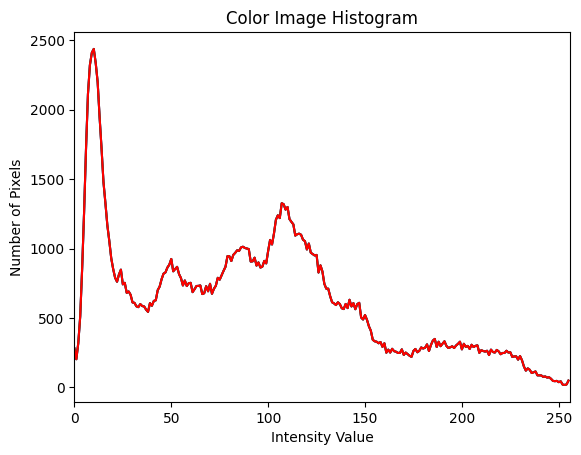

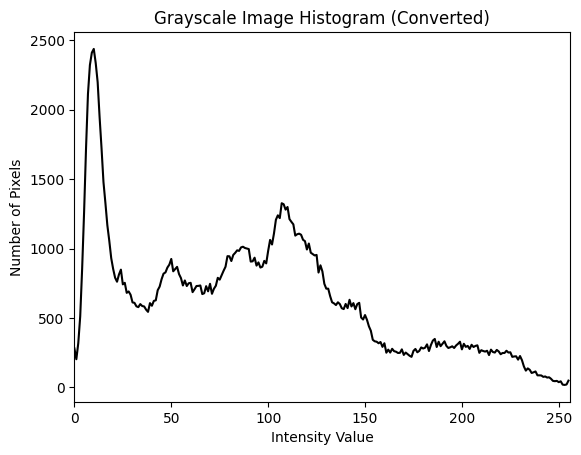

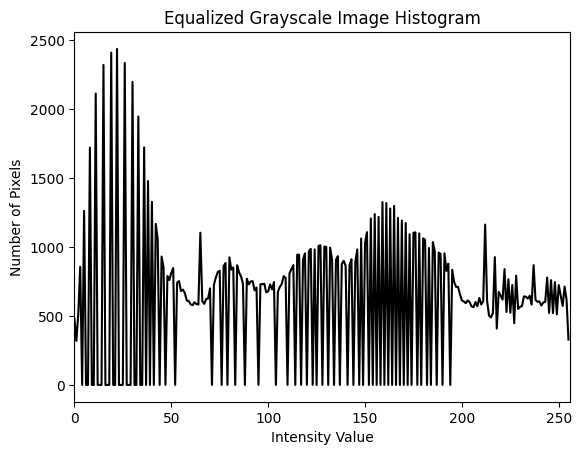

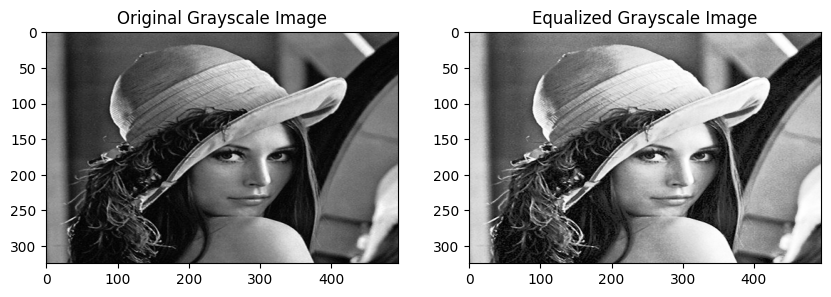

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
color_image = cv2.imread("/content/photo advanced computer.png")  # Replace with your image path
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Function to compute and display histogram
def plot_histogram(image, title, color=None):
    if len(image.shape) == 2:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
    else:  # Color image
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
    plt.title(title)
    plt.xlabel("Intensity Value")
    plt.ylabel("Number of Pixels")
    plt.xlim([0, 256])
    plt.show()

# Display histograms
plot_histogram(gray_image, "Grayscale Image Histogram", color='black')
plot_histogram(color_image, "Color Image Histogram")

# Convert to grayscale and analyze histogram
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
plot_histogram(gray_image, "Grayscale Image Histogram (Converted)", color='black')

# Histogram equalization
equalized_image = cv2.equalizeHist(gray_image)
plot_histogram(equalized_image, "Equalized Grayscale Image Histogram", color='black')

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Grayscale Image")
plt.show()

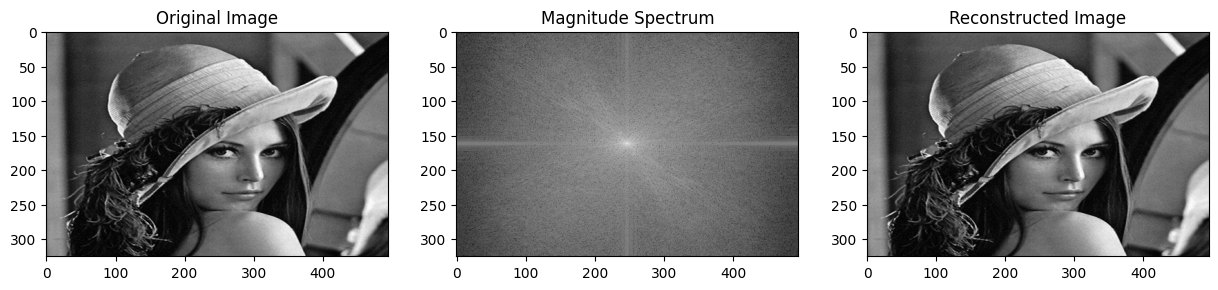

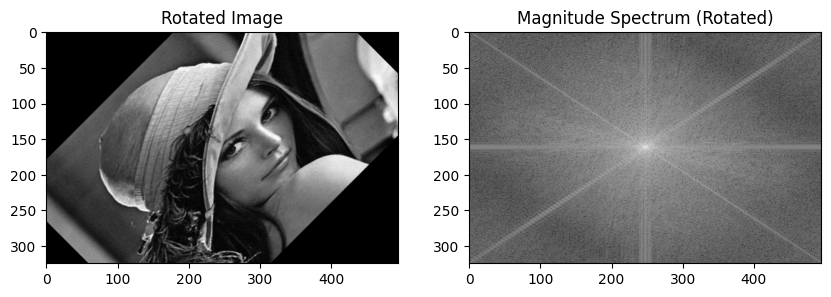

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
gray_image = cv2.imread("/content/photo advanced computer.png", cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Compute FFT
dft = np.fft.fft2(gray_image)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

# Compute Inverse FFT
idft_shift = np.fft.ifftshift(dft_shift)
reconstructed_image = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(reconstructed_image)

# Display original, magnitude spectrum, and reconstructed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.show()

# Verify Rotation Property
angle = 45  # Rotation angle
rows, cols = gray_image.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(gray_image, M, (cols, rows))

# Compute FFT of rotated image
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated_shift))

# Display rotated image and its magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image")
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title("Magnitude Spectrum (Rotated)")
plt.show()